# Hiyerarşik Kümeleme

Adı üstünde veriyi hiyerarşik bir yapı haline getirir.

Hiyerarşikm olan olmayan kümeleme yöntemelri farkı dersek

- Hiyerarşik olmayan kümelemede sadece gözlemler kümelenebilir değişkenler kümelenemez. Ve küme sayısını kendimiz belirleriz

- Hiyerarşik kğmeledme ise değişknelerde kümelenebilir. grafiği çevirdiğimiz ve gözlemelri değişken, 
değişkneleri gözlem gibi kabul ettiğimizi düşünelim. bu durumda değişkneleri kümeleyebilriz. Ayrıca küme sayısını kullanılan algoritmalarla belirleriz

- Karar ağaçlarından farkı ise: Karar ağaçalarınd adallanma bağımlı değişkene göre yapılır. Değişknelerin bağımlı değişkneen
 etkisine göre dallanam yapılır. Hiyerarşik kümelemede ise bilindiği üzere bir bağımşı değişkne yok tamamen makinemiz kendi kümeliyor. 
Bunu yaparkende gözlemlerin birbirlerinde uzaklığınıa bakılıyor. Özetler karar ağaçalarında bağımlı değişknle ilişkiye, hiyerarşik kümelemde gözlemelr arası uzaklığa bakılır.

Birleştirici Kümeleme(Aşşağıdan yukarıya):

- Başlangıçta gözlem sasyısı kadar kümeleme vardır.

- Veri setinde birbirine en yakın olan iki gözlem bulunur

- bu iki nokta b,r araya getirilerek yeni bir gözlme oluşturulur. Bu işlem tekraralanarak yukarıya kadaar çıkılır. Yani tüm gözlemler tek bir kümde toplanana  kadar işlem devam eder.

Birlerine yakınlıkları uzaklık hesapplama yöntemleriyle bulunur. Öklid, manhattan, korelasyon vb.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [5]:
data=pd.read_csv("USArrests.csv")
df=data.copy()
df.index=df.iloc[:,0]
df=df.iloc[:,1:5]
df=df.rename_axis(index=None)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
from scipy.cluster.hierarchy import linkage
complete=linkage(df,"complete")
average=linkage(df,"average")
single=linkage(df,"single")

In [9]:
dir(copmlete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

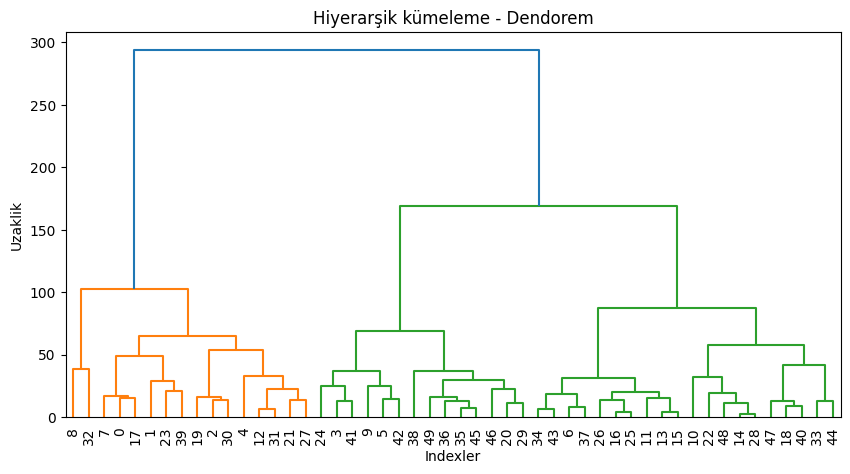

In [24]:
#hocam dendogram ile küme sayısını belirleyeceğiz 
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,5))
plt.title("Hiyerarşik kümeleme - Dendorem")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")
dendrogram(complete, leaf_font_size=10);#leaf_fontsize aman birşey değil alttaki yazının büyüklüğnü ifasde ediyor :)

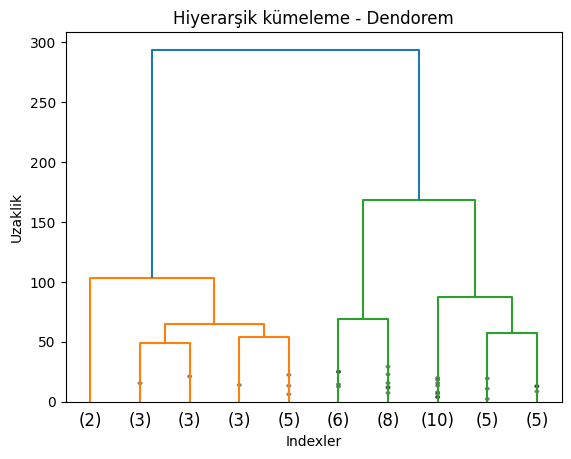

In [19]:
# hocam hepsini değilde son bileşen şu kadaar kümeyi görmek istiyorum dersen

#plt.figure(figsize=(10,5))
plt.title("Hiyerarşik kümeleme - Dendorem")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")
dendrogram(complete, truncate_mode="lastp", p=10, show_contracted=True);

#dikkat edersen son olarak birleşen 10 kümei gösterdi ve bunların herbirinin altında kaç küme olduğunu da altın ayazdı
#bu şekilde kaç kümelik yeri gözlemlermek ietediğini ve hatta kaç küemde kaç gözlem var görmek istersen bunu kullabilirsin
#eğer ala kümeleri toplarsanda 50 elde edesin bu da gözlem sayısı

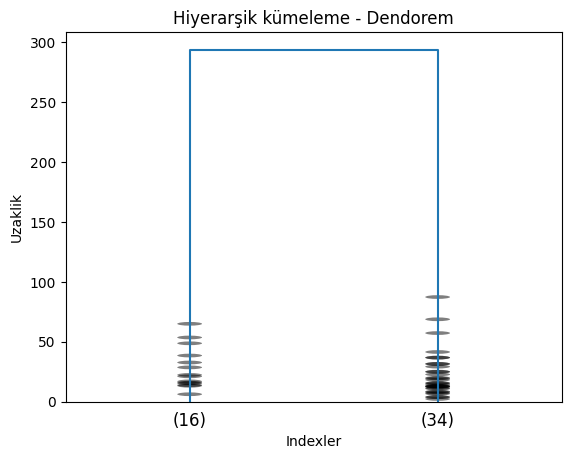

In [23]:
plt.title("Hiyerarşik kümeleme - Dendorem")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")
dendrogram(complete, truncate_mode="lastp", p=2, show_contracted=True);#sadece ikili :))

# Optimum Küme Sayısı Belirleme

In [26]:
from sklearn.cluster import AgglomerativeClustering#nasıl mı bulduk optimium küme sayısını? Bakarak. gerçekten grafiğe baktık ve 4 dedik:)
clustering=AgglomerativeClustering(n_clusters=4, 
                                    affinity="euclidean",
                                    linkage="ward")
clustering.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])